<a href="https://colab.research.google.com/github/nrajmalwar/Project/blob/master/Session%209/Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Dataset

Import important libraries and functions

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential, Model
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout, Input, Conv2D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [3]:
train_features.shape

(50000, 32, 32, 3)

Plot random images from each class

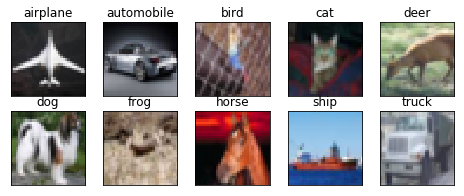

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# New Model Architecture

In [4]:
# Define the model from Assignment 6A

model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3))) # RF = 3 ; output_size = 32
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(64, 3, 3, border_mode='same')) # 5
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, 3, border_mode='same')) # 7
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(32, 1, 1)) # 7
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) # 14 ; 16

model.add(Convolution2D(64, 3, 3, border_mode='same')) # RF = 16 ; output_size = 16
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(128, 3, 3, border_mode='same')) # 18
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.1))

model.add(Convolution2D(256, 3, 3, border_mode='same')) # 20
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(64, 1, 1)) # 20
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) # 40 ; 8

model.add(Convolution2D(128, 3, 3, border_mode='same')) # 42
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.1))

model.add(Convolution2D(256, 3, 3, border_mode='same')) # 44

model.add(Convolution2D(10, 1, 1)) # 44
model.add(GlobalAveragePooling2D())

model.add(Activation('softmax'))

model.summary()

W0627 17:42:18.980419 139986697488256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
W0627 17:42:19.001218 139986697488256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0627 17:42:19.003961 139986697488256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0627 17:42:19.031706 139986697488256 deprecation_wrapper

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
__________

The default learning rate of 0.001 in Adam is very high for the network as the validation accuracy kept fluctuating. We instead start with a value of 0.003 and reduce it with each epoch using LRScheduler

In [9]:
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

W0627 15:25:27.832338 140383620720512 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [13]:
# Mount Google Drive to save the model
from google.colab import drive
drive.mount('/content/drive')

# Use ModelCheckpoint
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/EVA_Asgn_9.hdf5', monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Model Training

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`
  if __name__ == '__main__':
W0627 15:26:49.645290 140383620720512 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.

Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 32s 81ms/step - loss: 2.2477 - acc: 0.2329 - val_loss: 2.3875 - val_acc: 0.2333

Epoch 00001: val_acc improved from -inf to 0.23330, saving model to /content/drive/My Drive/Colab Notebooks/EVA_Asgn_9.hdf5
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 27s 69ms/step - loss: 1.5284 - acc: 0.4237 - val_loss: 1.5805 - val_acc: 0.4311

Epoch 00002: val_acc improved from 0.23330 to 0.43110, saving model to /content/drive/My Drive/Colab Notebooks/EVA_Asgn_9.hdf5
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 26s 68ms/step - loss: 1.2281 - acc: 0.5489 - val_loss: 1.8406 - val_acc: 0.4151

Epoch 00003: val_acc did not improve from 0.43110
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.00

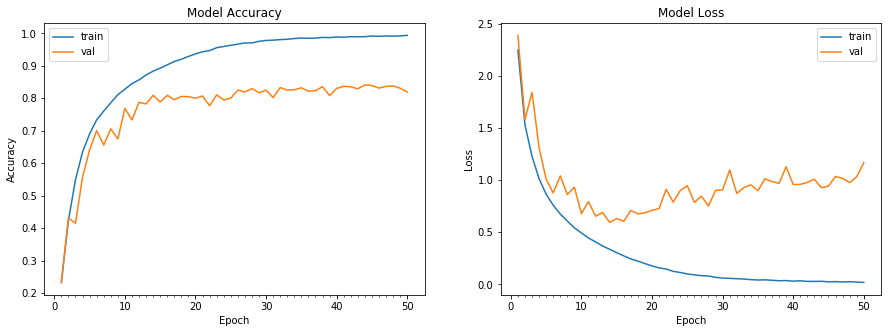

Accuracy on test data is: 81.91


In [14]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[LearningRateScheduler(scheduler, verbose=1), checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

#Grad Cam

Import libraries to implement Grad Cam

In [0]:
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


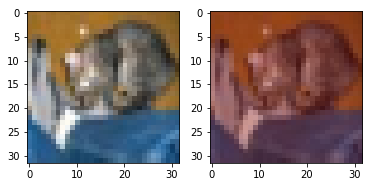

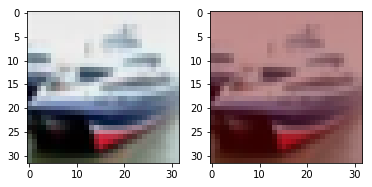

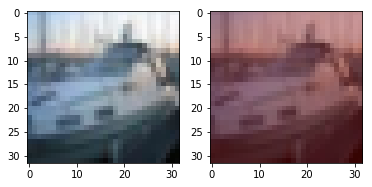

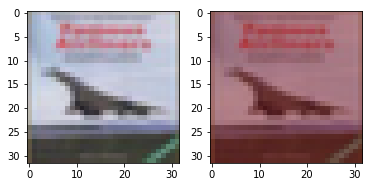

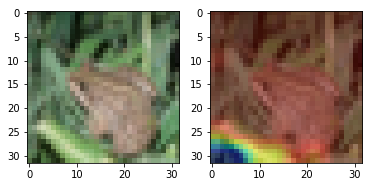

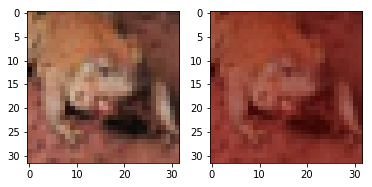

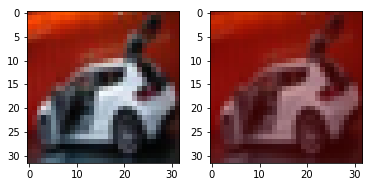

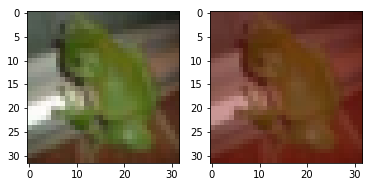

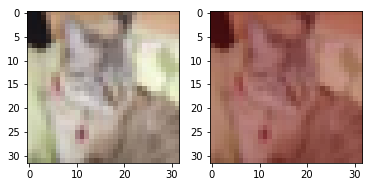

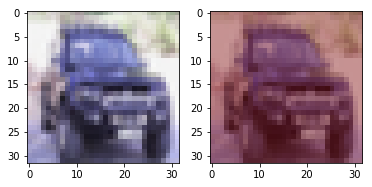

In [75]:
# Run Grad Cam for 10 images from test data
for j in range(10):
  
  img = test_features[j]
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv2d_9")
  
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(128):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
      
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  img = test_features[j]
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  
  f, (ax1, ax2) = plt.subplots(1,2)
  ax1.imshow(img)
  ax2.imshow(superimposed_img)

I ran the gradcam with several convolution layers from the end, however none of them show any high activation for all the images. Only one image has some high activation but not at the right spot. This point is to be further analysed and discussed.

# Cutout

In [0]:
# Function to implement Cutout
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

In [0]:
datagen = ImageDataGenerator(preprocessing_function=get_random_eraser(v_l=0, v_h=120)) 

train_generator = datagen.flow(train_features, train_labels, batch_size = 128)

Plot images after cutout

W0627 17:42:54.693486 139986697488256 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0627 17:42:54.709301 139986697488256 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0627 17:42:54.734700 139986697488256 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


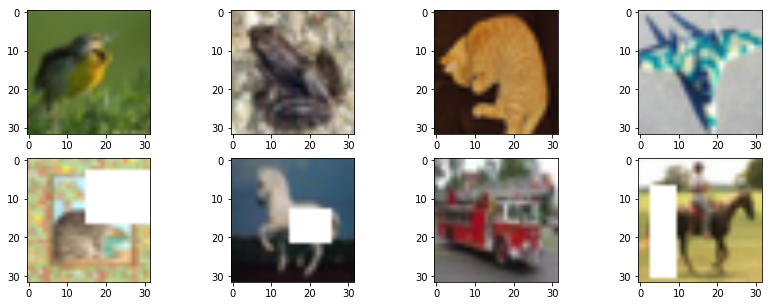

In [8]:
# Plot the images after cutout
x_batch, y_batch = next(train_generator)

fig = plt.figure(figsize=(14, 5))

for i in range(8):
    sub = fig.add_subplot(2, 4, i + 1)
    sub.imshow(x_batch[i,:,:], interpolation='bilinear')

In [0]:
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [0]:
# Use ModelCheckpoint
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/EVA_Asgn_9_2.hdf5', monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

# Cutout Model Training

In [13]:
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(train_generator,
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[LearningRateScheduler(scheduler, verbose=1), checkpoint])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`
  """
W0627 17:43:23.689416 139986697488256 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed i

Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 31s 81ms/step - loss: 2.4785 - acc: 0.1599 - val_loss: 3.0130 - val_acc: 0.1161

Epoch 00001: val_acc improved from -inf to 0.11610, saving model to /content/drive/My Drive/Colab Notebooks/EVA_Asgn_9_2.hdf5
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 27s 70ms/step - loss: 1.8252 - acc: 0.3262 - val_loss: 2.0213 - val_acc: 0.2456

Epoch 00002: val_acc improved from 0.11610 to 0.24560, saving model to /content/drive/My Drive/Colab Notebooks/EVA_Asgn_9_2.hdf5
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 27s 70ms/step - loss: 1.5984 - acc: 0.4105 - val_loss: 1.9939 - val_acc: 0.3315

Epoch 00003: val_acc improved from 0.24560 to 0.33150, saving model to /content/drive/My Drive/Colab Notebooks/EVA_Asgn_9_

NameError: ignored

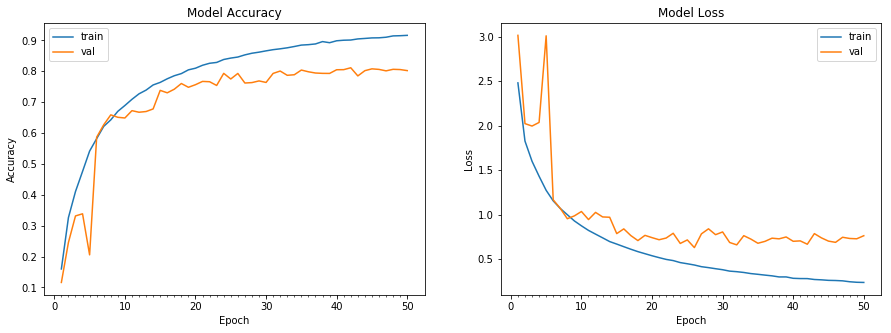

Accuracy on test data is: 80.21


In [16]:
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Grad Cam after Cutout

In [0]:
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

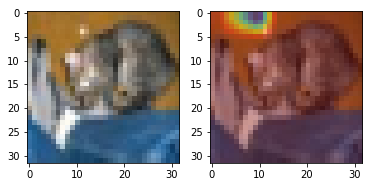

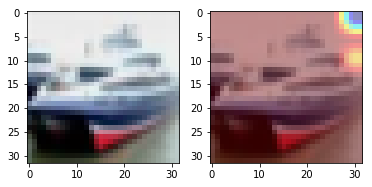

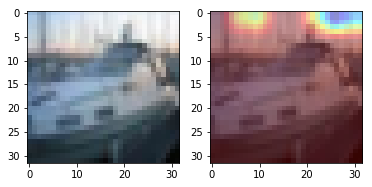

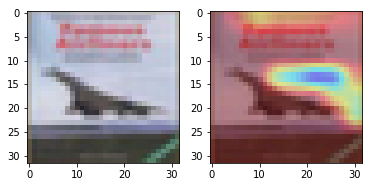

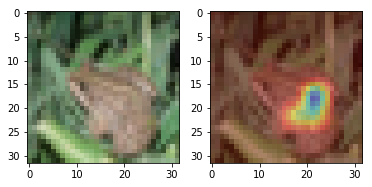

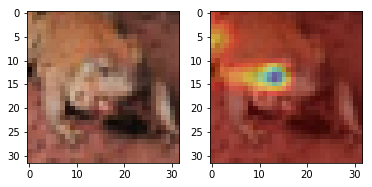

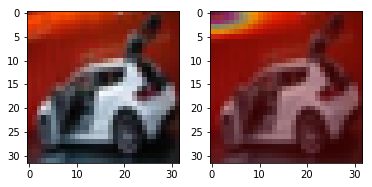

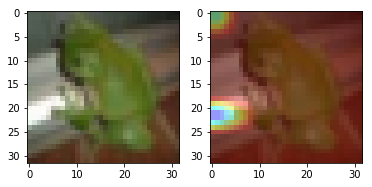

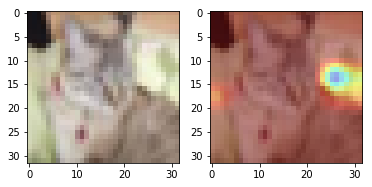

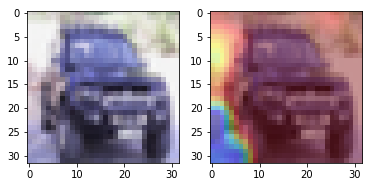

In [19]:
# Run Grad Cam for 10 images from test data
for j in range(10):
  
  img = test_features[j]
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv2d_9")
  
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(128):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
      
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  img = test_features[j]
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  
  f, (ax1, ax2) = plt.subplots(1,2)
  ax1.imshow(img)
  ax2.imshow(superimposed_img)

After implementing cutout, the activations are high for all the images and at the right spot for a lot of the images. This implies that cutout is a very good augmentation strategy.